In [5]:
import numpy as np
# Constants
g = 9.81  # gravitational acceleration (m/s^2)
L1 = 1.0  # length of the first pendulum (m)
L2 = 1.0  # length of the second pendulum (m)
m1 = 1.0  # mass of the first pendulum (kg)
m2 = 1.0  # mass of the second pendulum (kg)

# Initial conditions
theta1_0 = np.pi / 10  # initial angle of the first pendulum (rad)
theta2_0 = np.pi / 8  # initial angle of the second pendulum (rad)
z1_0 = 0.0            # initial angular velocity of the first pendulum (rad/s)
z2_0 = 0.0            # initial angular velocity of the second pendulum (rad/s)

# inisiasi eigenvalue - eigenvector
max_error = 1E-12     # batas error
a = np.array([[L1 / g,  (m2 * L2)/((m1 + m2) * g)], 
              [L1 / g,  L2 / g]])

# pencarian eigenvalue metode QR
i=0
while abs(a[1,0]) > max_error:
    q, r = np.linalg.qr(a)
    a = np.dot(r, q)
    i += 1

print(f'Final a in iteration {i}:')
print(a)
omega_a=1/np.sqrt(a[0,0])
omega_b = 1 / np.sqrt(a[1,1])
print("Omega_a:",omega_a,"Omega_b:",omega_b)

# pencarian eigenvector
k_a = L1 / (g * a[0,0] - L2)
k_b = L1 / (g * a[1,1] - L2)
print("A2_a/A1_a:",k_a)
print("A2_b/A1_b:",k_b)

Final a in iteration 15:
[[ 1.74017001e-01  5.09683996e-02]
 [-4.46682738e-13  2.98565972e-02]]
Omega_a: 2.3971993978629986 Omega_b: 5.7873512980514
A2_a/A1_a: 1.4142135623699967
A2_b/A1_b: -1.4142135623699967


In [6]:
# analytic solution function
A_1a = (k_b * theta1_0 - theta2_0) / (k_b - k_a)
A_1b = (k_a * theta1_0 - theta2_0) / (k_a - k_b)
alpha_b = (k_a * z1_0 - z2_0) / ((k_a - k_b) * A_1b * omega_b)
alpha_a = (k_b * z1_0 - z2_0) / ((k_b - k_a) * A_1a * omega_a)
def analytic_theta1(t):
    c_a = np.cos(omega_a * t)
    s_a = np.sin(omega_a * t)
    c_b = np.cos(omega_b * t)
    s_b = np.sin(omega_b * t)
    return A_1a * (c_a + alpha_a * s_a) + A_1b * (c_b + alpha_b * s_b)

def analytic_theta2(t):
    c_a = np.cos(omega_a * t)
    s_a = np.sin(omega_a * t)
    c_b = np.cos(omega_b * t)
    s_b = np.sin(omega_b * t)
    return A_1a * k_a * (c_a + alpha_a * s_a) + A_1b * k_b * (c_b + alpha_b * s_b)

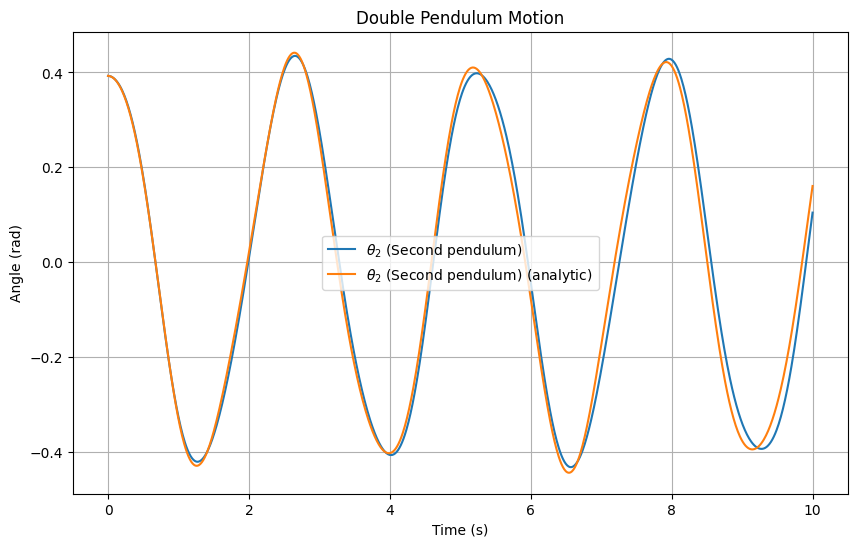

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Equations of motion
def equations(t, y):
    theta1, z1, theta2, z2 = y

    delta_theta = theta1 - theta2

    denom1 = L1 * (2 * m1 + m2 - m2 * np.cos(2 * delta_theta))
    denom2 = L2 * (2 * m1 + m2 - m2 * np.cos(2 * delta_theta))

    theta1_dot = z1
    theta2_dot = z2

    z1_dot = (
        -g * (2 * m1 + m2) * np.sin(theta1)
        - m2 * g * np.sin(theta1 - 2 * theta2)
        - 2 * np.sin(delta_theta) * m2 * (L2 * z2**2 + L1 * z1**2 * np.cos(delta_theta))
    ) / denom1

    z2_dot = (
        2 * np.sin(delta_theta)
        * (
            L1 * (m1 + m2) * z1**2
            + g * (m1 + m2) * np.cos(theta1)
            + L2 * m2 * z2**2 * np.cos(delta_theta)
        )
    ) / denom2

    return [theta1_dot, z1_dot, theta2_dot, z2_dot]

# Time span and resolution
t_span = (0, 10)  # time range (s)
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # time points for evaluation

# Solve the system of ODEs
initial_conditions = [theta1_0, z1_0, theta2_0, z2_0]
solution = solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval, method="RK45")

# Extract solutions
t = solution.t
y1 = solution.y[0]  # theta1
y2 = solution.y[2]  # theta2

analytic_y1 = analytic_theta1(t)
analytic_y2 = analytic_theta2(t)

# Plot the results
plt.figure(figsize=(10, 6))
# plt.plot(t, y1, label=r"$\theta_1$ (First pendulum)")
plt.plot(t, y2, label=r"$\theta_2$ (Second pendulum)")
# plt.plot(t, analytic_y1, label=r"$\theta_1$ (First pendulum) (analytic)")
plt.plot(t, analytic_y2, label=r"$\theta_2$ (Second pendulum) (analytic)")
plt.title("Double Pendulum Motion")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid()
plt.show()